In [225]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)

Loading required package: ggplot2



In [255]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [256]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [257]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negcounts[,colSums(negcounts)>0]
remove=negcounts[,colSums(negcounts)>0]

,TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATAGTGAAGACAGCTCACTGGACAGATACTGACGCTAAAGCTCGAAAGCGTGGGGAGCAAACAGG,TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGTGGTCAAGAAAGTCTGAAGTTAAAGCTCGGGGCTCAACCCCGACCCGCTTTGGAAACTACTTGACTAGAGTCATGAAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGGAATGAACTGACACTGAGGGACGAAAGCGTGGGGAGCAAACAGG,TACGGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGAGCGTAGGCGGCTGTGTAAGTTGGATGTGAAATCCCGGGGCTTAACCCCGGAACTGCATCCAAAACTGCAGAGCTAGAGTACAGTAGAGGGAGGTAGAATTTCCGGTGTAGCGGTGAAATGCGTAGAGATCGGAAGGAATACCAGTGGCGAAGGCGGCCTCCTGGACTGATACTGACGCTGAGGTTCGAAAGCGTGGGGAGCAAACAGG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGGGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGAGATTGGAAAGAACACCGATGGCGAAGGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTAATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTAAAGTTAAAGCCTGGGGCTCAACCCCAGCCCGCTTTGGATACTGGTAGACTAGAGTTATAGAGAGGTTAGTGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAACTAACTGGCTATACACAGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGGGGGGTGCTAGCGTTAATCGGAATTACTGGGCGTAAAGAGTTTGTAGGCGGTTTGATAAGTCAGATGTGAAAGACCTAAGCTCAACTTAGGAAGTGCATATGATACTGTCTAACTAGAGTTTAACAGAGGATTAAGGAATTTTCGGTGTAGCGGTGAAATGCGTAGATATCGAAAGGAACATCAATGGCGAAGGCAATAATCTGGGATTAGACTGACGCTGAGAAACGAAAGCTTGGGTAGCAAACAGG,TACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTTGTCGCGTCGTCTGTGAAATCCCGGGGCTTAACTTCGGGCGTGCAGGCGATACGGGCATAACTTGAGTGCTGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCAGTAACTGACGCTGAGGAGCGAAAGCATGGGTAGCGAACAGG,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGAGAGGGGCAAGCGTT

In [258]:
asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [259]:
NCOL(asv_all)

[1] 16364

In [260]:
meta$Experiment

[1] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
  [6] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [11] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [16] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [21] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [26] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [31] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [36] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [41] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [46] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [51] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [56] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [61] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [66] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [71] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [76] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [81] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [86] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [91] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [96] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[101] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[106] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[111] "Field17"     "Field17"     "Lab18"       "Lab18"       "Lab18"      
[116] "Lab18"       "Negative"    "Negative"    "Negative"    "Negative"   
[121] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[126] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[131] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[136] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[141] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[146] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[151] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[156] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[161] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[166] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[171] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[176] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[181] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[186] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[191] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[196] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[201] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[206] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[211] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[216] "Lab18"       "Lab18"       "CE18"        "CE18"        "CE18"       
[221] "CE18"        "CE18"        "CE18"        "CE18"        "CE18"       
[226] "CE18"        "CE18"        "CE18"        "CE18"        "CE18"       
[231] "CE18"        "CE18"        "CE18"        "Riverkeeper" "Riverkeeper"
[236] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[241] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[246] "Riverkeeper" "Negative"    "Riverkeeper" "Riverkeeper" "Riverkeeper"
[251] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[256] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[261] "Riverkeeper" "Riverkeeper" "Riverkeeper" "R

In [261]:
#pull out the Carryover effect samples
meta_ce=as.data.frame(meta[meta$Experiment=="CE18",])

In [262]:
asv_ce=asv_all[rownames(asv_all) %in% meta_ce$UniqueID,]

In [263]:
asv_ce=asv_ce[,colSums(asv_ce)>0]

In [264]:
head(asv_ce)

,TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG,TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG,TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG,TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGATTATTAAGTCAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTATTAGTCTAGAGTCCGGGAGAGGTGAGTGGAATTCCTAGTGTAGAGGTGAAATTCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGCCCGGTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGGG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTGATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAGAGTCTAGGAGAGGAAGCTGGAATTCTTGGAGGAGGGGTGAAATCTGTAGATCCCAAGGAGAACACCAGAGGCGAAGGCGAGCTTCTGGCCATAGACTGACACTGAGATGCGAAAGCGTGGGTAGCGAACAGG,⋯,TACGGAGGGCGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGATTTGTAAGTCGAGTGTGAAAGCCCTGGGCTTAACCTAGGAAGTGCGCTCGAAACTGCAAGTCTTGAGTACGGGAGAGGGTAGCGGAATTCCCGGTGTAGAGGTGAAATTCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCTACCTGGACCGATACTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG,TACGGAGGGTGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCGCGCAGGCGGATTGATAAGTCAGATGTGAAATCTCGGGGCTCAACTCCGAAACTGCGTCTGAAACTATTGATCTAGAGTTATGGAGAGGGATGGGGAATTTCCTGTGTAGGGGTAAAATCCGTAGAGATAGGAAGGAACACCAGAGGCGAAGGCGCCATCCTGGACATATACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGG,TACGAACTGTGCGAACGTTATTCGGAATCACTGGGCTTACAGGGTGCGTAGGCGGTGAGACAAGTCAGATGTGAAATCCCACAGCTCAACTGTGGAACTGCGTTTGAAACTGTCTTACTTGAGTGATCTAGAGGTATGCGGAACTTCCGGTGGAGCGGTGAAATGTGTTGATATCGGAAGGAACACCAGAGGCGAAGGCGGCATACTGGGGATCTACTGACGCTGAGGCACGAAAGCCAGGGGAGCAAATGGG,TACGGAGGGTGCAAGCGTTACCCGGAATCACTGGGCGTAAAGGGCGTGTAGGCGGGATGTTAAGTCTGGTTTTAAAGACTGCGGCTCAACCGCAGGGATGGACTGGATACTGGCATTCTTGACCTCTGGAGAGAGAACTGGAATTCCTGGTGTAGCGGTGGAATGCGTAGATACCAGGAGGAACACCAATGGCGAAGGCAGGTTCTTGGACAGAAGGTGACGCTGAGGCGCGAAAGTGTGGGGAGCGAACCGG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCCTTAAAAGTCAGATGTGAAATCCCCGAGCTCAACTTGGGAACTGCGTTTGAAACTCTAAGGCTAGAATATGTCAGAGGGGGGTAGAATTCCACGTGTAGCAGTGAAATGCGTAGAGATGTGGAGGAATACCAATGGCGAAGGCAGCCCCCTGGGATAATATTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCTGTTTAGTAAGTCAGTGGTGAAATACCTTTGCTCAACAAAGGGGCTGCCATTGATACTGCTAGGCTGGAATATGGTTGCTGTTGGCGGAATGTGTAGTGTAGCGGTGAAATGCATAGATATTACACAGAACAC

In [265]:
taxa_ce=taxa[rownames(taxa)%in% colnames(asv_ce),]

In [266]:
taxa_ce=as.matrix(taxa_ce)

In [267]:
head(taxa_ce)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,NA
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,NA
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingoaurantiacus
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,NA,NA,NA
TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG,Bacteria,Bacteroidota,Bacteroidia,NA,NA,NA
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium PCC-6307


In [268]:
head(meta_ce)

,V1,UniqueID,Experiment,Year,Site,Treatment1(Density),Treatment2(Diversity),Color/Bucket,Number,Species,RFTM_score,peacrabs,Phase_1_DO,Phase_1_temp,Phase_2_DO,Phase_2_Temp,Overall_treatment
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,218,2018__WBY_BBY_W30_CV,CE18,2018,,WBY,BBY,,30W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
2,219,2018__WBO_BBR_W03_CV,CE18,2018,,WBO,BBR,,03W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
3,220,2018__WBY_BBV_W65_CV,CE18,2018,,WBY,BBV,,65W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
4,221,2018__WBG_BBB_W56_CV,CE18,2018,,WBG,BBB,,56W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
5,222,2018__WPV_BPR_G11_CV,CE18,2018,,WPV,BPR,,11G,CV,NA,NA,Normoxic,Warm,Hypoxic,Warm,WPBP
6,223,2018__WPO_BPY_G28_CV,CE18,2018,,WPO,BPY,,28G,CV,NA,NA,Normoxic,Warm,Hypoxic,Warm,WPBP


In [269]:
row.names(meta_ce)=meta_ce$UniqueID

In [323]:
OTU = otu_table(t(asv_ce), taxa_are_rows = TRUE)
TAX = tax_table(taxa_ce)
Samp= sample_data(meta_ce)

In [271]:
rownames(meta_ce)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [272]:
sample_names(Samp)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [324]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [330]:
CE = phyloseq(OTU, TAX, Samp)

In [390]:
taxa_names(CE)

[1] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                                
   [2] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                              
   [3] "TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG"                                                                                                                                                                                                
   [4] "TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG"                                                                                                                                                                                                
   [5] "TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG"                                                                                                                                                                                                
   [6] "TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG"                                                                                                                                                                                                
   [7] "TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGATTATTAAGTCAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTATTAGTCTAGAGTCCGGGAGAGGTGAGTGGAATTCCTAGTGTAGAGGTGAAATTCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGCCCGGTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG"                                                                                                                                                                                                
   [8] "TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGGG"                                                                                                                                                                                                
   [9] "GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTGATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG"                                                                                                     

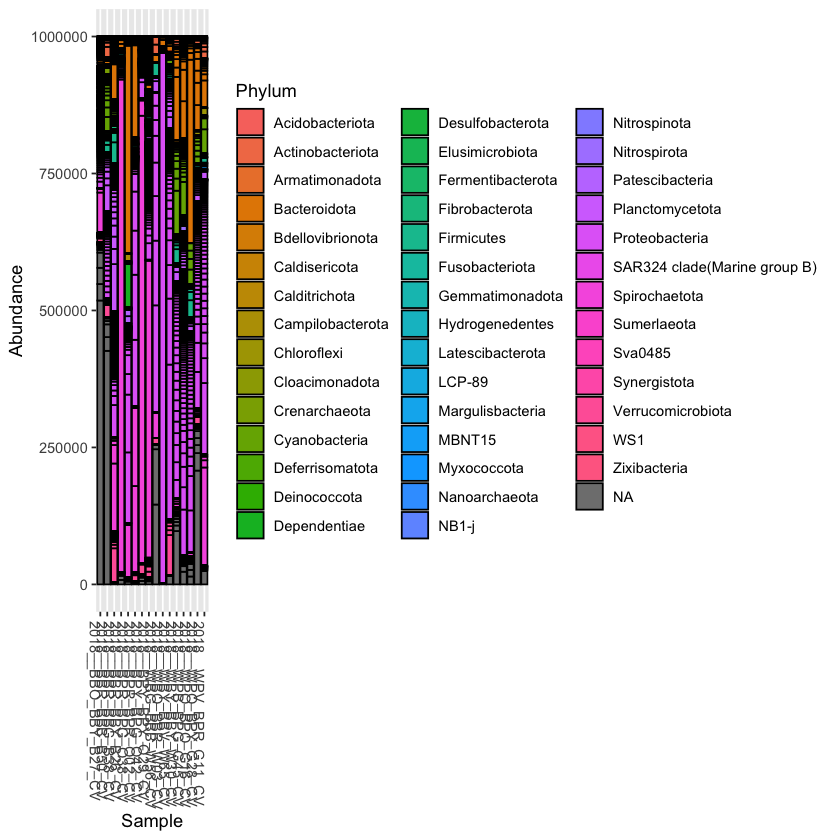

In [331]:
plot_bar(CE, fill = "Phylum")

In [332]:
CE.ord <- ordinate(CE, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1134579 
Run 1 stress 0.1052852 
... New best solution
... Procrustes: rmse 0.08972482  max resid 0.2876217 
Run 2 stress 0.1197093 
Run 3 stress 0.1111976 
Run 4 stress 0.1058391 
Run 5 stress 0.1111976 
Run 6 stress 0.1259147 
Run 7 stress 0.1169314 
Run 8 stress 0.1134579 
Run 9 stress 0.1052853 
... Procrustes: rmse 0.0003597013  max resid 0.001161909 
... Similar to previous best
Run 10 stress 0.1197093 
Run 11 stress 0.1259147 
Run 12 stress 0.1416125 
Run 13 stress 0.1166536 
Run 14 stress 0.1169314 
Run 15 stress 0.1052854 
... Procrustes: rmse 0.0001585987  max resid 0.0005109377 
... Similar to previous best
Run 16 stress 0.1052852 
... New best solution
... Procrustes: rmse 6.495241e-05  max resid 0.0002096668 
... Similar to previous best
Run 17 stress 0.3594398 
Run 18 stress 0.1166535 
Run 19 stress 0.3383031 
Run 20 stress 0.1325537 
*** Solution reached


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [333]:
(CE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2962 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 2962 taxa by 6 taxonomic ranks ]

In [278]:
head(meta_ce)

,V1,UniqueID,Experiment,Year,Site,Treatment1(Density),Treatment2(Diversity),Color/Bucket,Number,Species,RFTM_score,peacrabs,Phase_1_DO,Phase_1_temp,Phase_2_DO,Phase_2_Temp,Overall_treatment
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2018__WBY_BBY_W30_CV,218,2018__WBY_BBY_W30_CV,CE18,2018,,WBY,BBY,,30W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
2018__WBO_BBR_W03_CV,219,2018__WBO_BBR_W03_CV,CE18,2018,,WBO,BBR,,03W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
2018__WBY_BBV_W65_CV,220,2018__WBY_BBV_W65_CV,CE18,2018,,WBY,BBV,,65W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
2018__WBG_BBB_W56_CV,221,2018__WBG_BBB_W56_CV,CE18,2018,,WBG,BBB,,56W,CV,NA,NA,Normoxic,Ambient,Hypoxic,Ambient,WBBB
2018__WPV_BPR_G11_CV,222,2018__WPV_BPR_G11_CV,CE18,2018,,WPV,BPR,,11G,CV,NA,NA,Normoxic,Warm,Hypoxic,Warm,WPBP
2018__WPO_BPY_G28_CV,223,2018__WPO_BPY_G28_CV,CE18,2018,,WPO,BPY,,28G,CV,NA,NA,Normoxic,Warm,Hypoxic,Warm,WPBP


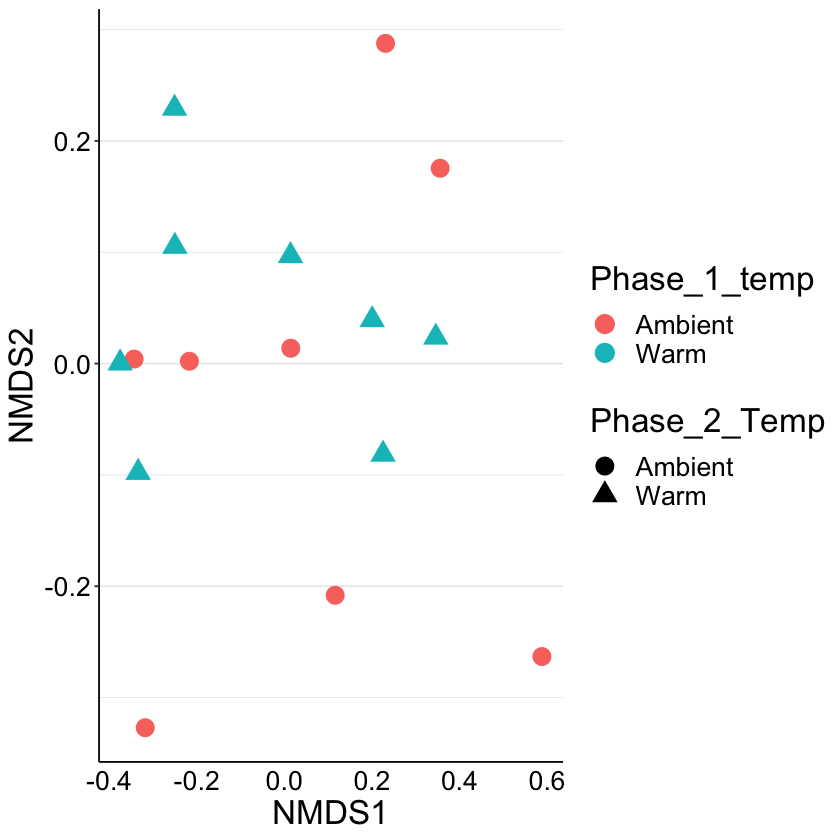

In [254]:
plot_ordination(physeq, physeq.ord, type="samples", color="Phase_1_temp", shape="Phase_2_Temp")+ 
#geom_polygon(aes(fill=Phase_2_Temp))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

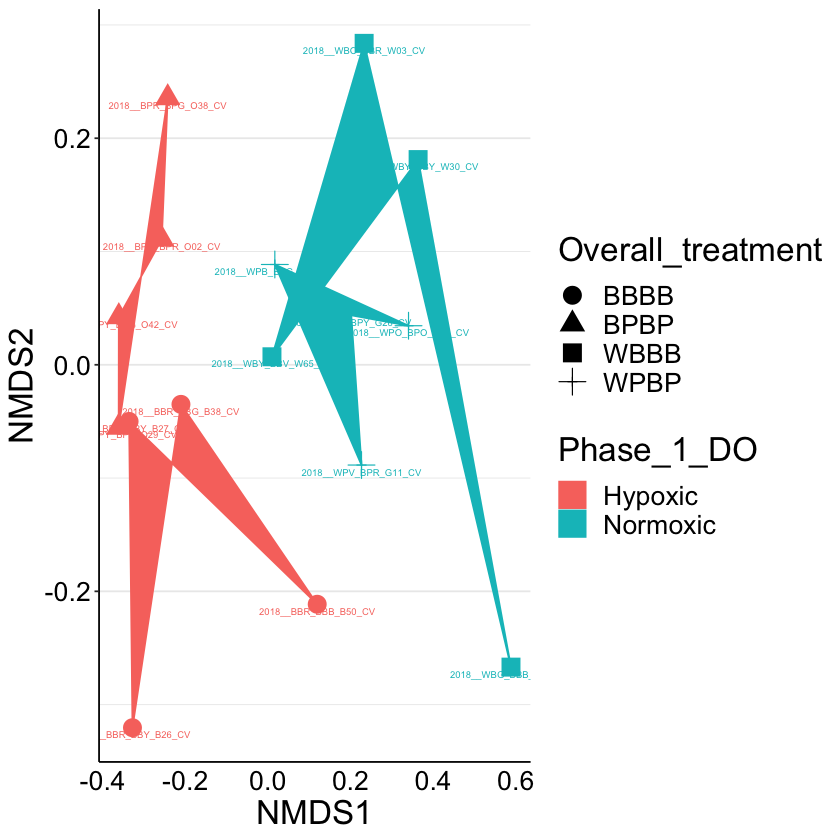

In [391]:
plot_ordination(physeq, physeq.ord, type="Samples", color="Phase_1_DO", shape="Overall_treatment", label="UniqueID")+ 
geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

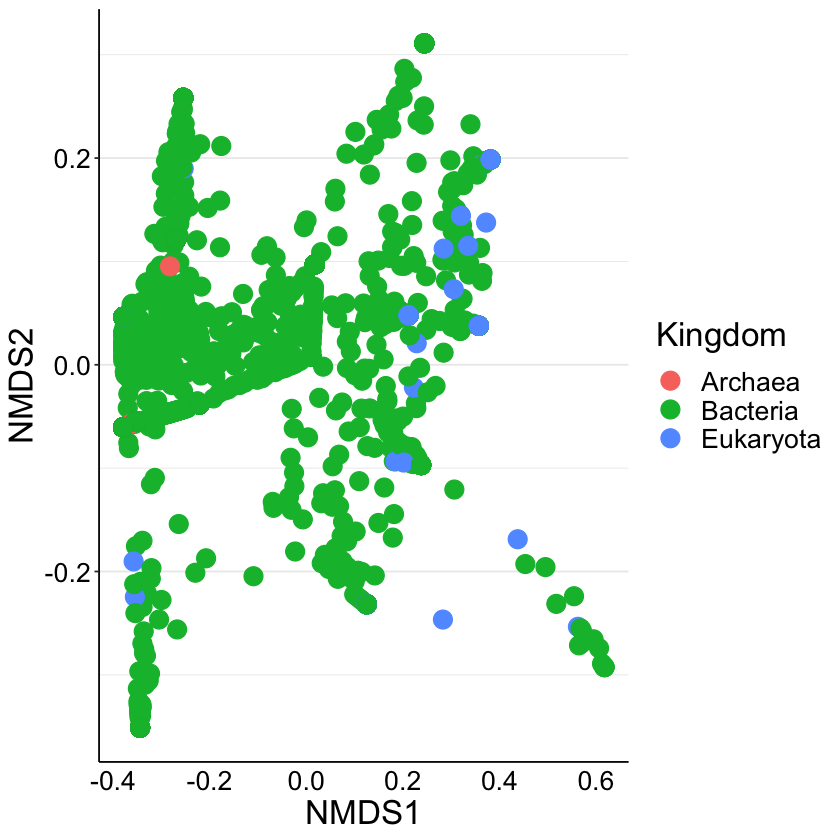

In [377]:
plot_ordination(physeq, physeq.ord, type="Taxa", color="Kingdom")+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

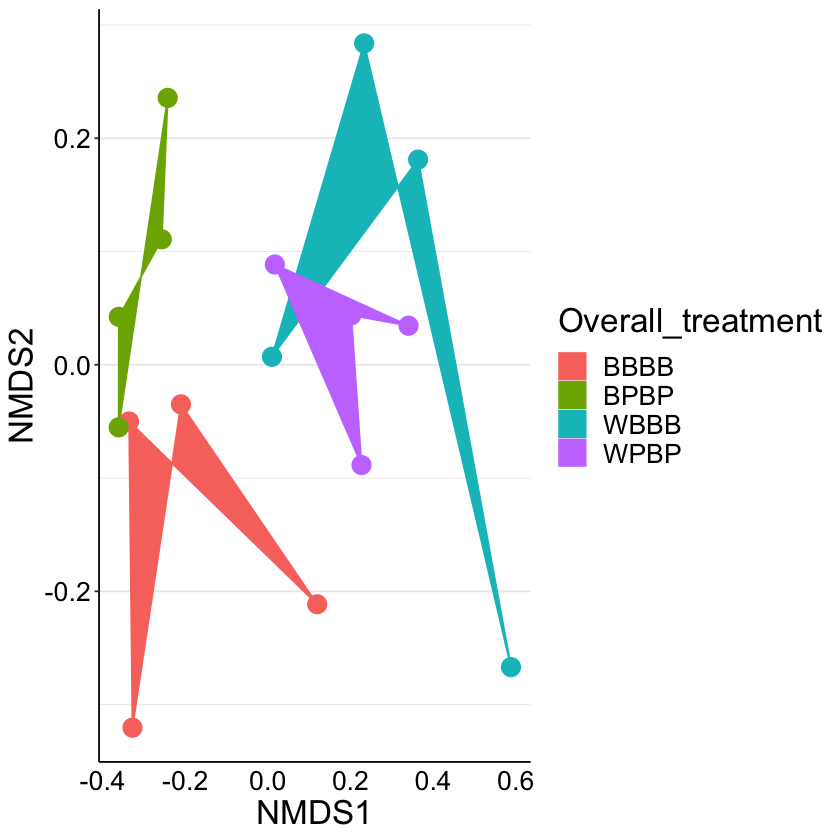

In [281]:
plot_ordination(physeq, physeq.ord, type="samples", color="Overall_treatment")+ 
geom_polygon(aes(fill=Overall_treatment))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


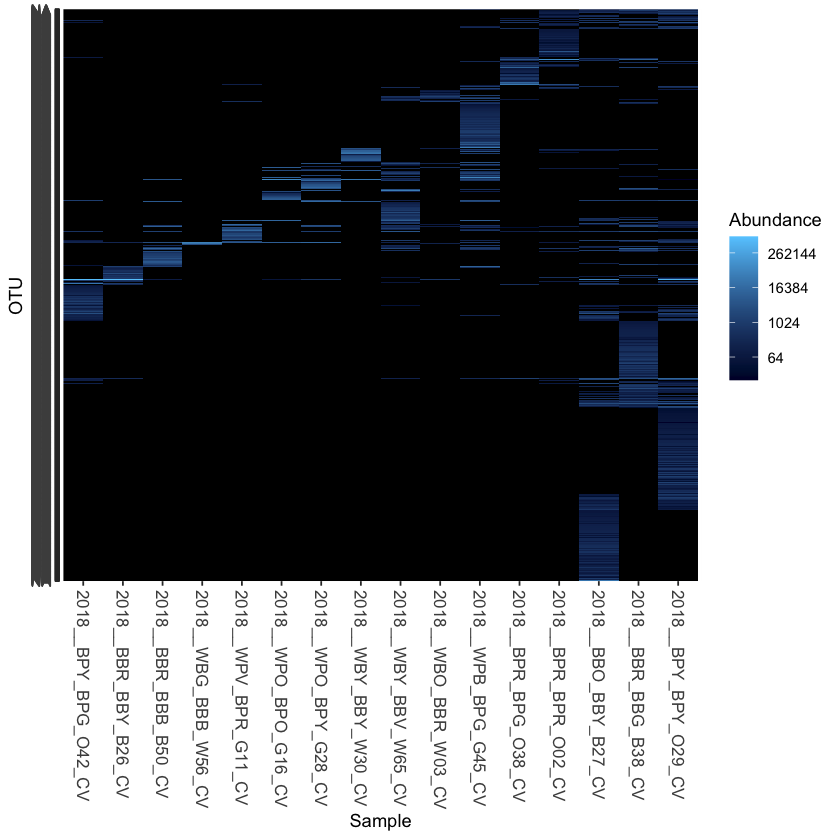

In [326]:
plot_heatmap(physeq, taxa.label="Phylum")

Warning message:
“Transformation introduced infinite values in discrete y-axis”


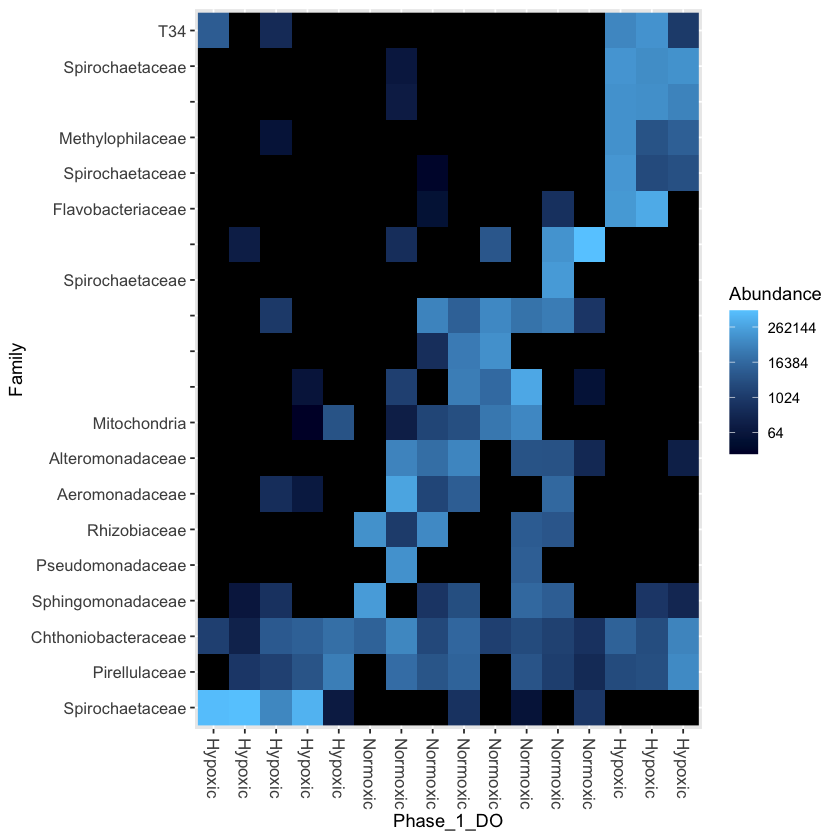

In [387]:
CE_bac20 = subset_taxa(CE, Kingdom=="Bacteria")
CE_bac20 = prune_taxa(names(sort(taxa_sums(CE_bac20),TRUE)[1:20]), CE_bac20)
plot_heatmap(CE_bac20, "NMDS", "bray", "Phase_1_DO", "Family")

In [349]:
?subset_taxa

In [327]:
#top5 phyla?
phylum.sum = tapply(taxa_sums(physeq), tax_table(physeq)[, "Phylum"], sum, na.rm=TRUE)
top5phyla = names(sort(phylum.sum, TRUE))[1:5]
physeq2 = prune_taxa((tax_table(physeq)[, "Phylum"] %in% top5phyla), physeq)

Warning message:
“Transformation introduced infinite values in discrete y-axis”


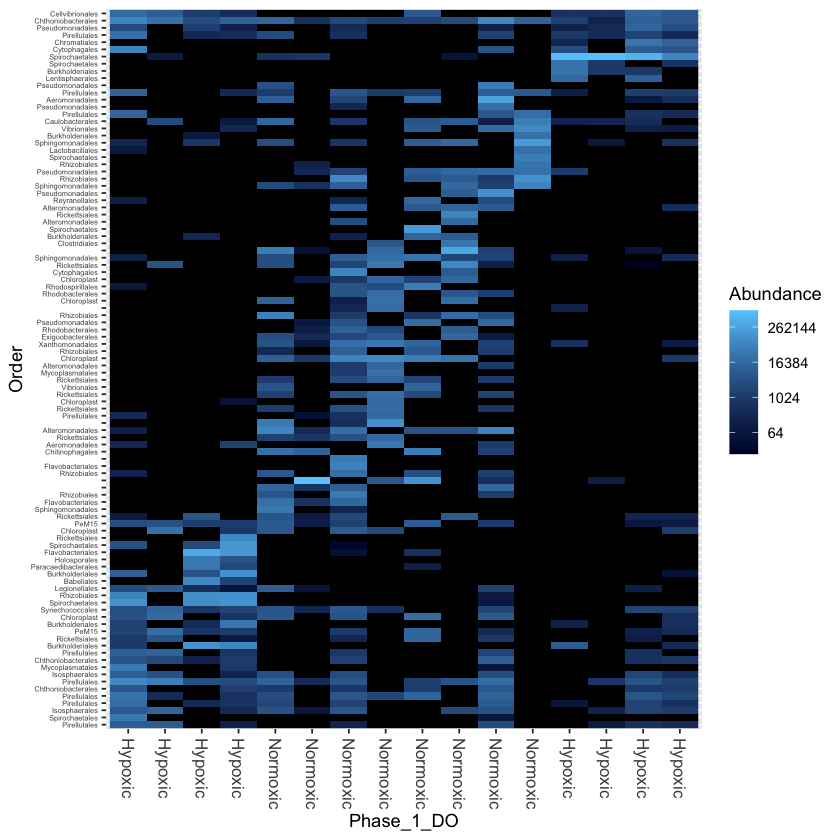

In [383]:
plot_heatmap(CE_bac100, "NMDS", "bray", "Phase_1_DO", "Order")

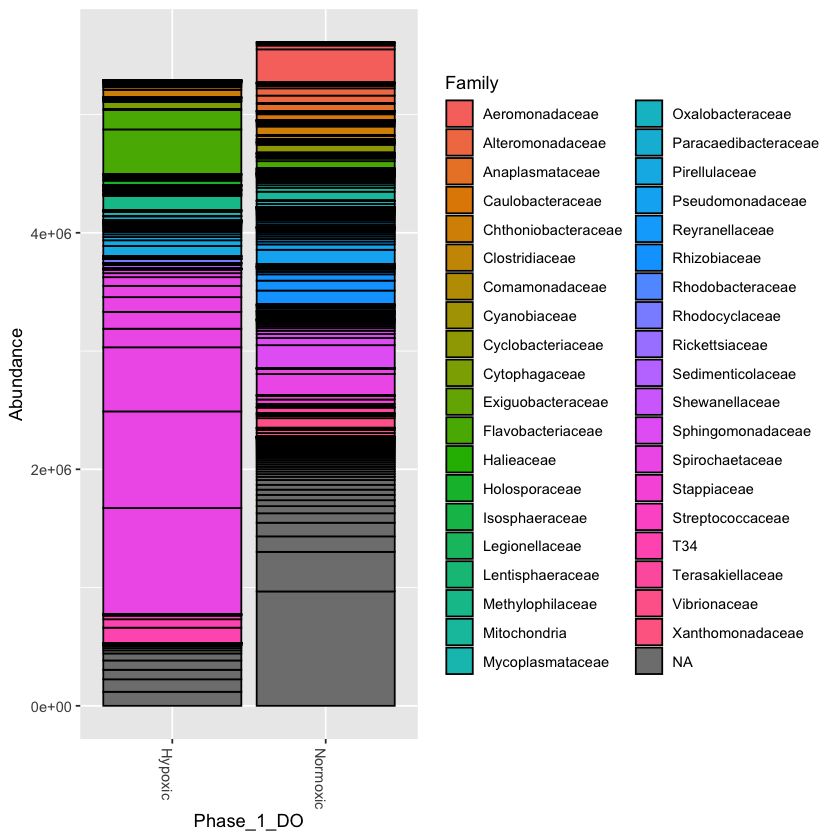

In [388]:
plot_bar(CE_bac100, "Phase_1_DO", fill = "Family")

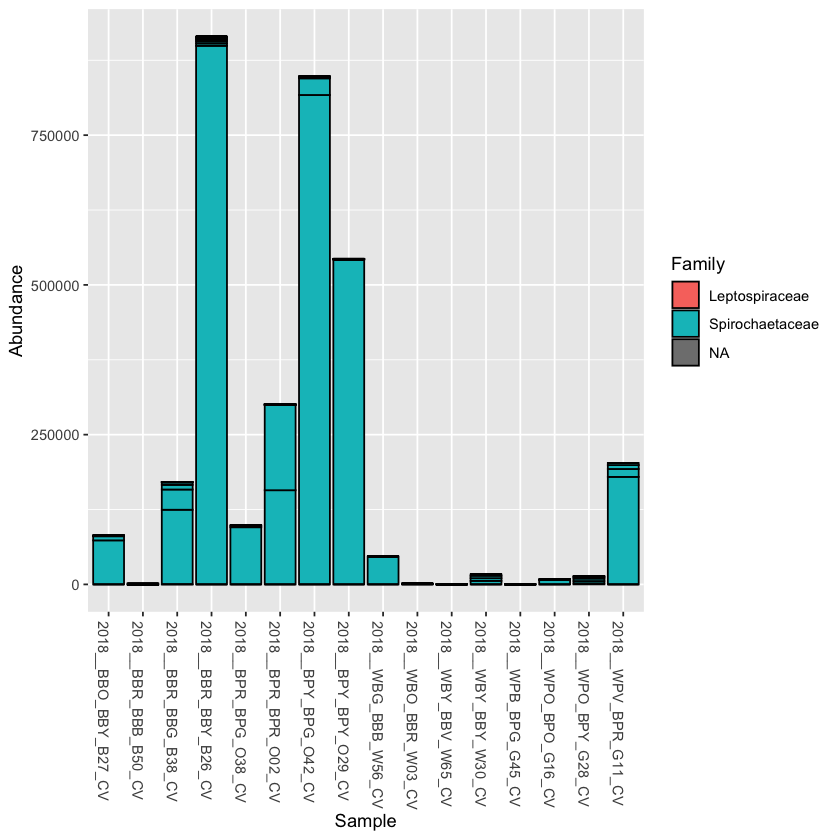

In [348]:
CE_Spiro = subset_taxa(CE, Phylum=="Spirochaetota")
plot_bar(CE_Spiro, fill="Family")

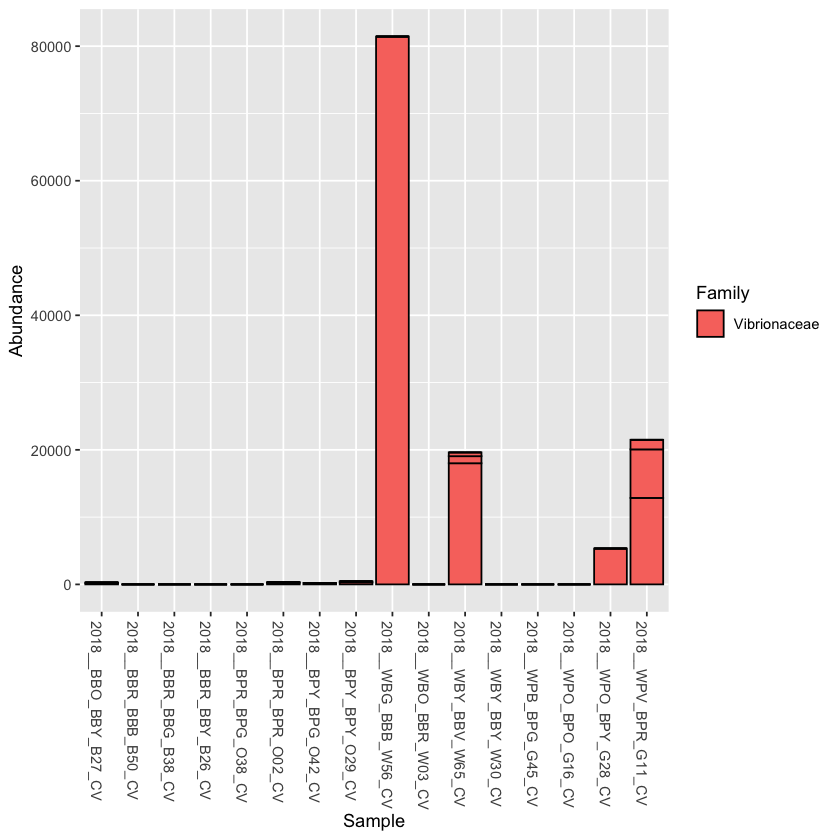

In [361]:
CE_Vibrio = subset_taxa(CE, Order=="Vibrionales")
plot_bar(CE_Vibrio, fill="Family")

In [369]:
TAX

,Kingdom,Phylum,Class,Order,Family,Genus
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,NA
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,NA
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingoaurantiacus
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,NA,NA,NA
TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG,Bacteria,Bacteroidota,Bacteroidia,NA,NA,NA
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium PCC-6307
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGATTATTAAGTCAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTATTAGTCTAGAGTCCGGGAGAGGTGAGTGGAATTCCTAGTGTAGAGGTGAAATTCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGCCCGGTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Proteobacteria,Alphaproteobacteria,NA,NA,NA
TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGGG,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,LD29
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTGATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NA,NA
TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAGAGTCTAGGAGAGGAAGCTGGAATTCTTGGAGGAGGGGTGAAATCTGTAGATCCCAAGGAGAACACCAGAGGCGAAGGCGAGCTTCTGGCCATAGACTGACACTGAGATGCGAAAGCGTGGGTAGCGAACAGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Sediminispirochaeta


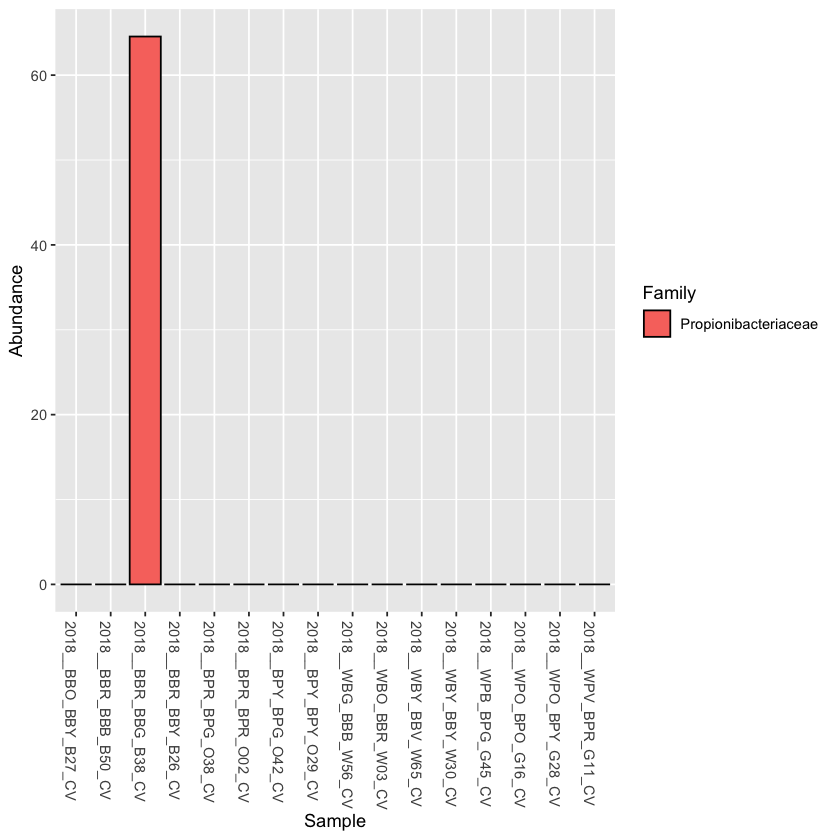

In [379]:
CE_Pro = subset_taxa(CE, Family=="Propionibacteriaceae")
plot_bar(CE_Pro, fill="Family")

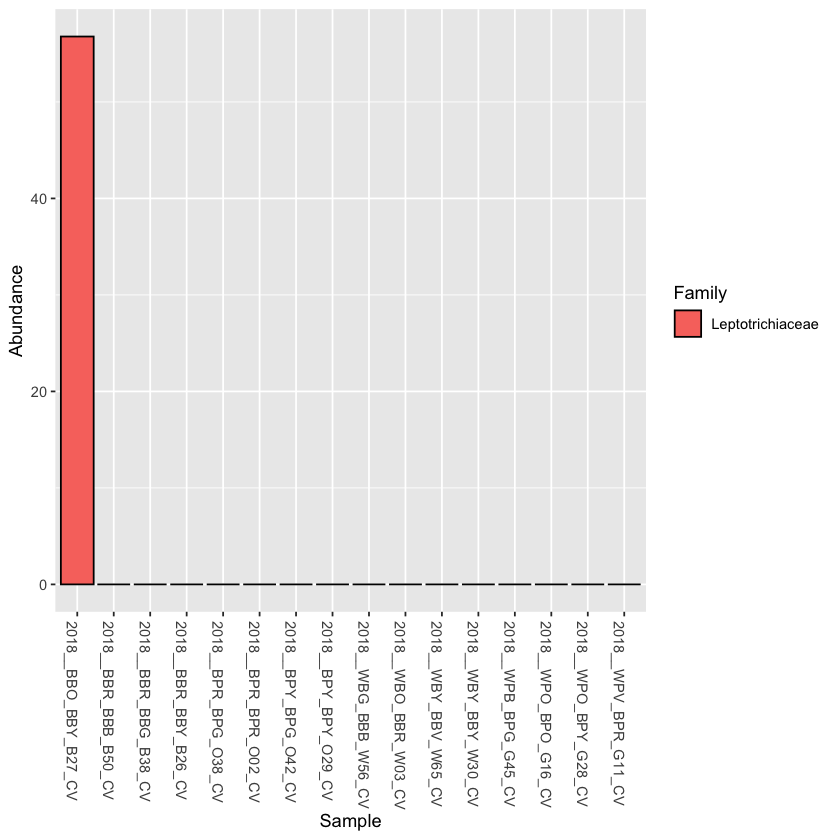

In [371]:
CE_Fuso = subset_taxa(CE, Order=="Fusobacteriales")
plot_bar(CE_Fuso, fill="Family")

In [ ]:
BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm
